In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')
sns.set(style='dark')

In [2]:
loan = pd.read_csv('loan.csv',encoding="ISO-8859-1")
loan.shape

(39717, 111)

In [3]:
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Dropping features that has more than 60% null values.

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
RemoveCols = loan.isnull().sum(axis=0) > round(loan.shape[0] * 0.60,0)


In [7]:
RemoveCols.shape

(111,)

In [8]:
RemoveCols.tail()

tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
dtype: bool

In [9]:
loan.drop(RemoveCols[RemoveCols == True].index, axis=1,inplace=True)
loan.shape

(39717, 54)

## Data cleansing

Desc, URL, delinq_amnt,   acc_now_delinq, application_type, policy_code, pymnt_plan, chargeoff_within_12_mths, collections_12_mths_ex_med, tax_liens, initial_list_status, emp_title, recoveries, collection_recovery_fee, delinq_2yrs columns are dropped because it does not have any useful information, has null values in the maximum # of rows or values not well distributed.


In [10]:
loan.drop(['desc','url','delinq_amnt','acc_now_delinq','application_type','policy_code','pymnt_plan','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','initial_list_status','emp_title','recoveries','collection_recovery_fee','delinq_2yrs'],axis=1,inplace=True)
loan.shape

(39717, 39)

In [11]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... out_prncp_inv   total_pymnt  \
0   10.65%       162.87     B        B2  ...          0.00   5863.155187   
1   15.27%        59.83     C        C4  ...          0.00   1008.710000   
2   15.96%        84.33     C        C5  ...          0.00   3005.666844   
3   13.49%       339.31     C        C1  ...          0.00  12231.890000   
4   12.69%        67.79     B        B5  ...        524.06   3513.330000   

   total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee  \
0          5833.84         5000.00        863.16               0.00   
1          1008.71          456.46        435.17               0.00   
2          3005.67         2400.00        605.67               0.00   
3         12231.89        10000.00       2214.92              16.97   
4          3513.33         2475.94       1037.39               0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 39 columns]

In [12]:
loan.isnull().sum(axis=0)

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

### “out_prncp, out_prncp_in, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, loan_amnt, zip_code, revol_bal, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, member_id” features provide repetitive information or applicant payment details, and hence the same is dropped for further analysis


In [13]:
loan.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','loan_amnt','zip_code','revol_bal','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','member_id'],axis=1,inplace=True)
loan.shape

(39717, 25)

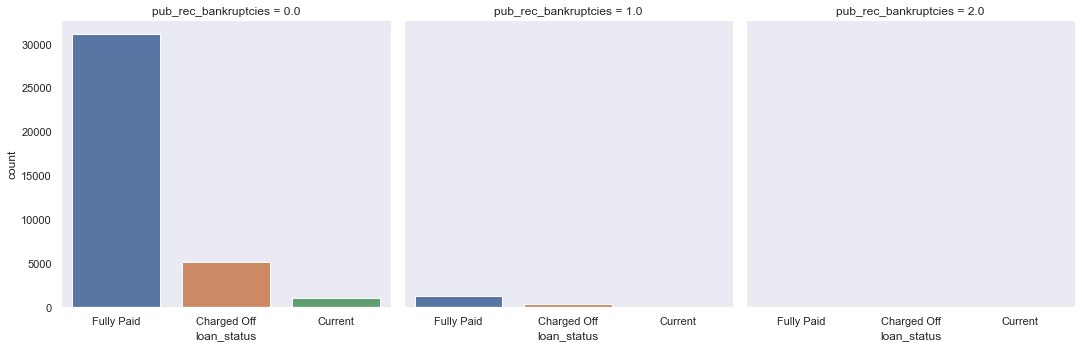

In [14]:
catplot = sns.catplot(x='loan_status',col='pub_rec_bankruptcies',data=loan,kind='count')
plt.show()


In [15]:
print(loan['title'].head(20))


0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
Name: title, dtype: object


In [16]:
print(loan.groupby('pub_rec')['loan_status'].count())

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: loan_status, dtype: int64


### Based on the above charts, it is fairly self explantory that pub_rec_bankruptcies, title, pub_rec columns does not provide any useful insights.

In [17]:
loan.drop(['pub_rec_bankruptcies','title','pub_rec'],axis=1,inplace=True)
loan.shape

(39717, 22)

In [18]:
loan.head()

id  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0  1077501         5000           4975.0   36 months   10.65%       162.87   
1  1077430         2500           2500.0   60 months   15.27%        59.83   
2  1077175         2400           2400.0   36 months   15.96%        84.33   
3  1076863        10000          10000.0   36 months   13.49%       339.31   
4  1075358         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  ...  issue_d  loan_status  \
0     B        B2  10+ years           RENT  ...   Dec-11   Fully Paid   
1     C        C4   < 1 year           RENT  ...   Dec-11  Charged Off   
2     C        C5  10+ years           RENT  ...   Dec-11   Fully Paid   
3     C        C1  10+ years           RENT  ...   Dec-11   Fully Paid   
4     B        B5     1 year           RENT  ...   Dec-11      Current   

          purpose addr_state    dti earliest_cr_line  inq_last_6mths open_acc  \
0     credit_card         AZ  27.65           Jan-85               1        3   
1             car         GA   1.00           Apr-99               5        3   
2  small_business         IL   8.72           Nov-01               2        2   
3           other         CA  20.00           Feb-96               1       10   
4           other         OR  17.94           Jan-96               0       15   

   revol_util  total_acc  
0      83.70%          9  
1       9.40%          4  
2      98.50%         10  
3         21%         37  
4      53.90%         38  

[5 rows x 22 columns]

# DATA PREPARATION

## Convert issue_d column to datetime datatype.

In [19]:
from datetime import datetime
loan['issue_date'] = loan['issue_d'].map(lambda x: datetime.strptime(x, '%b-%y'))
loan['issue_year'] = loan['issue_date'].dt.year
loan['issue_month'] = loan['issue_date'].dt.month
loan['issue_month'].head()


0    12
1    12
2    12
3    12
4    12
Name: issue_month, dtype: int64

In [20]:
loan.shape

(39717, 25)

In [21]:
loan.columns

Index(['id', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc', 'issue_date', 'issue_year',
       'issue_month'],
      dtype='object')

### Junk characters (%) are removed from int_rate & revol_util columns, and fill missing values with MEAN.


In [22]:
loan['int_rate'] = loan['int_rate'].astype(str).str.replace('%','').apply(lambda x:float(x))
loan['revol_util'] = loan['revol_util'].astype(str).str.replace('%','').apply(lambda x:float(x))
loan['revol_util'] = loan.revol_util.fillna(loan.revol_util.mean())

### Process 'emp_length' column in to a numerical grouped dataset

In [23]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [24]:
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('< 1 year','0')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('1 year','1')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('10+ years	','10')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('10+ years','10')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace(' 10+ years','10')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('10+ years\n','10')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('nan','-1')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('years','') 
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('n/a','-1')
loan['emp_length'] = loan['emp_length'].astype(str).str.replace('+','').map(lambda x:float(x))


### Exclude corpus data with loan_status as 'Current' as it does not provide useful insights in to defaulting applicants.


In [25]:
loan = loan[loan['loan_status'] != 'Current']
loan.info()
loan.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  int64         
 1   funded_amnt          38577 non-null  int64         
 2   funded_amnt_inv      38577 non-null  float64       
 3   term                 38577 non-null  object        
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  object        
 7   sub_grade            38577 non-null  object        
 8   emp_length           38577 non-null  float64       
 9   home_ownership       38577 non-null  object        
 10  annual_inc           38577 non-null  float64       
 11  verification_status  38577 non-null  object        
 12  issue_d              38577 non-null  object        
 13  loan_status          38577 non-

(38577, 25)

In [26]:
loan.head()

id  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  1077501         5000           4975.0   36 months     10.65       162.87   
1  1077430         2500           2500.0   60 months     15.27        59.83   
2  1077175         2400           2400.0   36 months     15.96        84.33   
3  1076863        10000          10000.0   36 months     13.49       339.31   
5  1075269         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  ...  addr_state    dti  \
0     B        B2        10.0           RENT  ...          AZ  27.65   
1     C        C4         0.0           RENT  ...          GA   1.00   
2     C        C5        10.0           RENT  ...          IL   8.72   
3     C        C1        10.0           RENT  ...          CA  20.00   
5     A        A4         3.0           RENT  ...          AZ  11.20   

  earliest_cr_line inq_last_6mths open_acc revol_util  total_acc issue_date  \
0           Jan-85              1        3       83.7          9 2011-12-01   
1           Apr-99              5        3        9.4          4 2011-12-01   
2           Nov-01              2        2       98.5         10 2011-12-01   
3           Feb-96              1       10       21.0         37 2011-12-01   
5           Nov-04              3        9       28.3         12 2011-12-01   

   issue_year  issue_month  
0        2011           12  
1        2011           12  
2        2011           12  
3        2011           12  
5        2011           12  

[5 rows x 25 columns]

## UNIVARIATE ANALYSIS

In [27]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

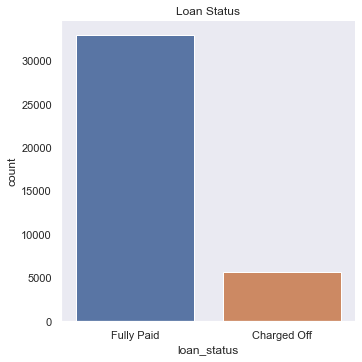

In [28]:
catPlot = sns.catplot(x='loan_status', data=loan ,kind="count")
plt.title("Loan Status")
plt.show()

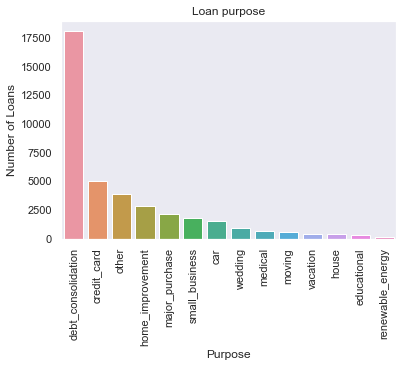

In [29]:
sns.countplot(x='purpose', data=loan, order=loan['purpose'].value_counts().index)
plt.title("Loan purpose")
plt.xlabel("Purpose")
plt.ylabel("Number of Loans")
plt.xticks(rotation=90)
plt.show()

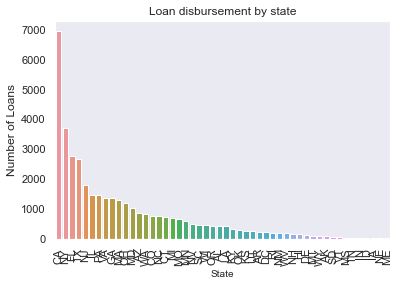

In [30]:
sns.countplot(x='addr_state', data=loan, order = loan['addr_state'].value_counts().index)
plt.title("Loan disbursement by state")
plt.xlabel("State",fontsize=10)
plt.ylabel("Number of Loans")
plt.xticks(rotation=90)
plt.show()

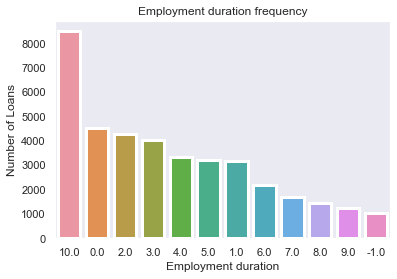

In [31]:
sns.countplot(x='emp_length', data=loan, order = loan['emp_length'].value_counts().index, linewidth=3)
plt.title("Employment duration frequency")
plt.xlabel("Employment duration")
plt.ylabel("Number of Loans")
plt.show()

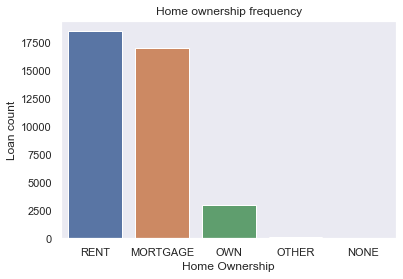

In [32]:
sns.countplot(x='home_ownership', data=loan, order = loan['home_ownership'].value_counts().index)
plt.title("Home ownership frequency")
plt.xlabel("Home Ownership")
plt.ylabel("Loan count")
plt.show()

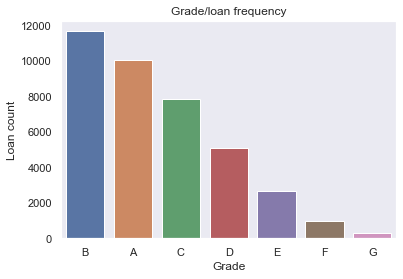

In [33]:
sns.countplot(x='grade', data=loan, order = loan['grade'].value_counts().index)
plt.title("Grade/loan frequency")
plt.xlabel("Grade")
plt.ylabel("Loan count")
plt.show()

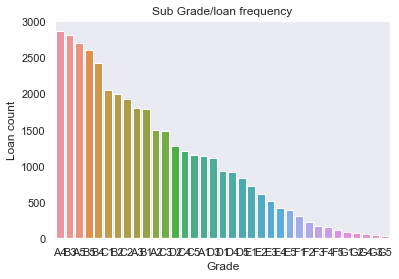

In [34]:
sns.countplot(x='sub_grade', data=loan, order = loan['sub_grade'].value_counts().index)
plt.title("Sub Grade/loan frequency")
plt.xlabel("Grade")
plt.ylabel("Loan count")
plt.show()

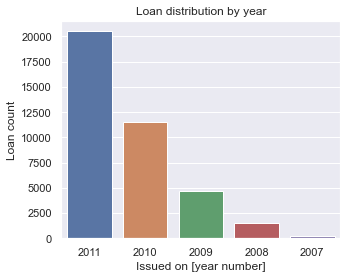

In [98]:
sns.countplot(x='issue_year', data=loan, order = loan['issue_year'].value_counts().index)
plt.title("Loan distribution by year")
plt.xlabel("Issued on [year number]")
plt.ylabel("Loan count")
plt.show()

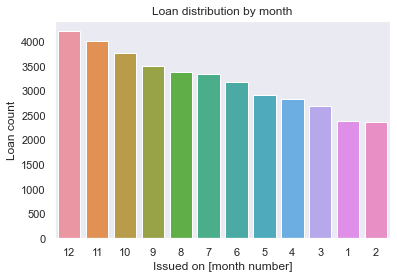

In [35]:
sns.countplot(x='issue_month', data=loan, order = loan['issue_month'].value_counts().index)
plt.title("Loan distribution by month")
plt.xlabel("Issued on [month number]")
plt.ylabel("Loan count")
plt.show()

In [36]:
loan.head()

id  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  1077501         5000           4975.0   36 months     10.65       162.87   
1  1077430         2500           2500.0   60 months     15.27        59.83   
2  1077175         2400           2400.0   36 months     15.96        84.33   
3  1076863        10000          10000.0   36 months     13.49       339.31   
5  1075269         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  ...  addr_state    dti  \
0     B        B2        10.0           RENT  ...          AZ  27.65   
1     C        C4         0.0           RENT  ...          GA   1.00   
2     C        C5        10.0           RENT  ...          IL   8.72   
3     C        C1        10.0           RENT  ...          CA  20.00   
5     A        A4         3.0           RENT  ...          AZ  11.20   

  earliest_cr_line inq_last_6mths open_acc revol_util  total_acc issue_date  \
0           Jan-85              1        3       83.7          9 2011-12-01   
1           Apr-99              5        3        9.4          4 2011-12-01   
2           Nov-01              2        2       98.5         10 2011-12-01   
3           Feb-96              1       10       21.0         37 2011-12-01   
5           Nov-04              3        9       28.3         12 2011-12-01   

   issue_year  issue_month  
0        2011           12  
1        2011           12  
2        2011           12  
3        2011           12  
5        2011           12  

[5 rows x 25 columns]

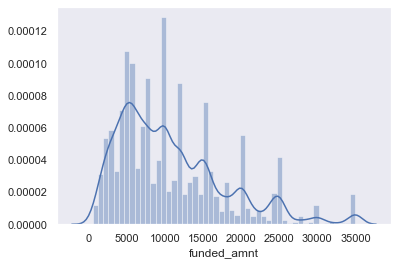

In [37]:
sns.distplot(loan.funded_amnt)
plt.show()

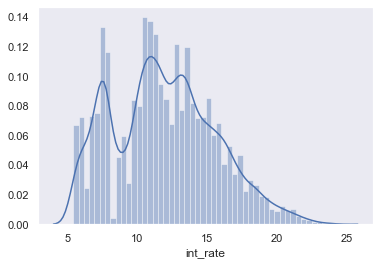

In [38]:
sns.distplot(loan.int_rate)
plt.show()

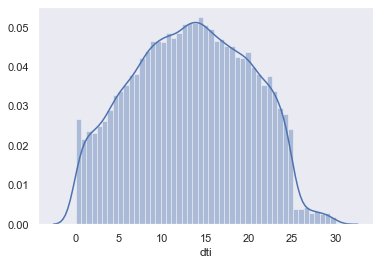

In [39]:
sns.distplot(loan.dti)
plt.show()

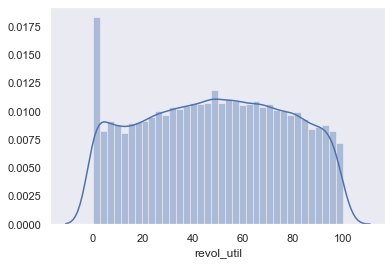

In [40]:
sns.distplot(loan.revol_util)
plt.show()

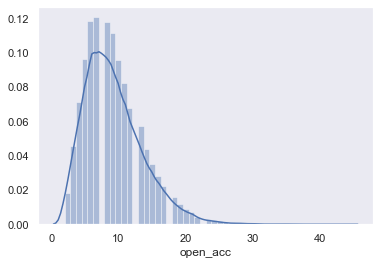

In [41]:
sns.distplot(loan.open_acc)
plt.show()

## SEGMENTED UNIVARIATE ANALYSIS

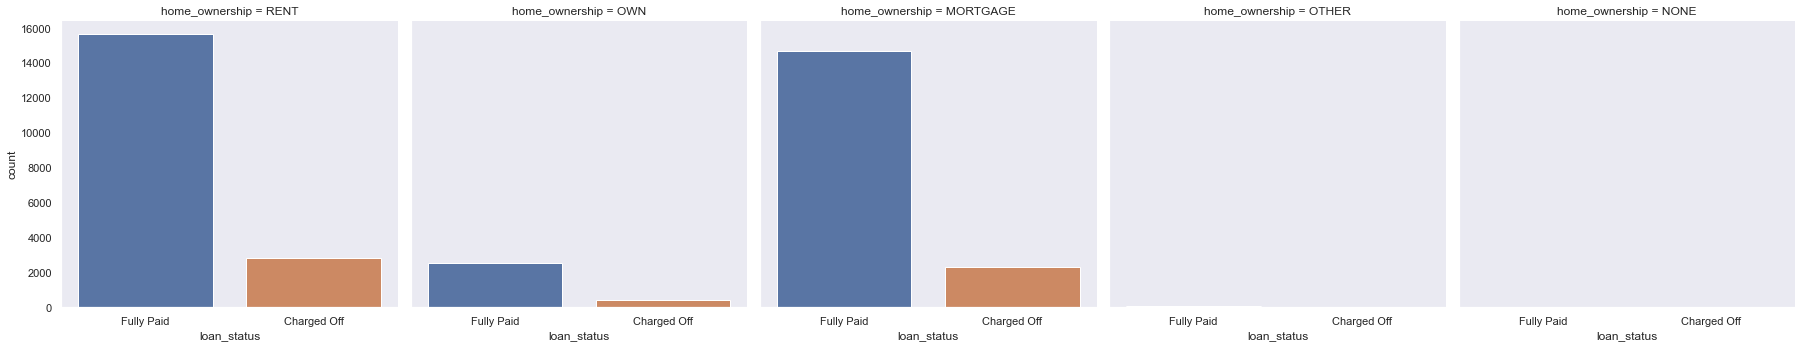

In [42]:
catplot = sns.catplot(x='loan_status',col='home_ownership',data=loan,kind='count')
plt.show()

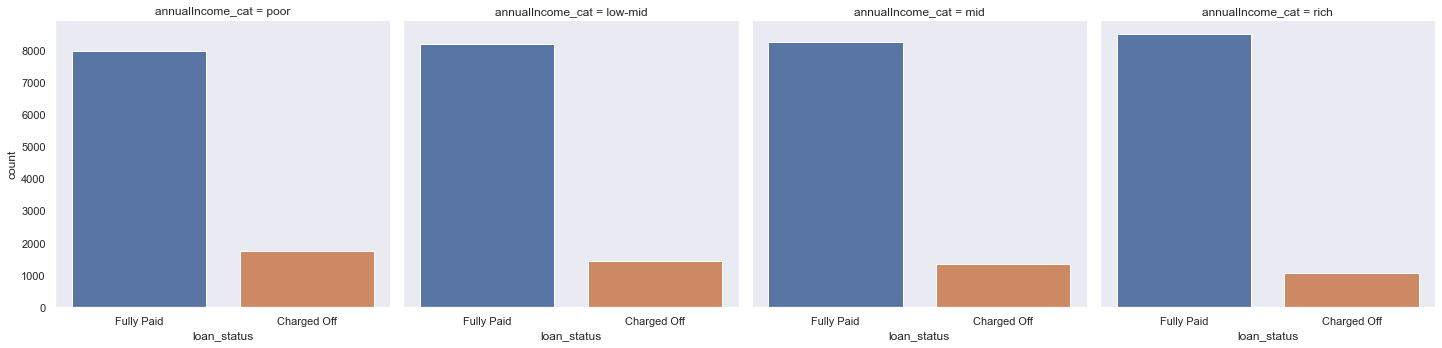

In [43]:
b_list = [4000,40404,59000,82300,6000000]
l_list = ['poor','low-mid','mid','rich']
loan['annualIncome_cat'] = pd.cut(loan['annual_inc'],bins=b_list,labels=l_list,include_lowest=True,right=True)
catplot = sns.catplot(x='loan_status',col='annualIncome_cat',data=loan,kind='count')
plt.show()

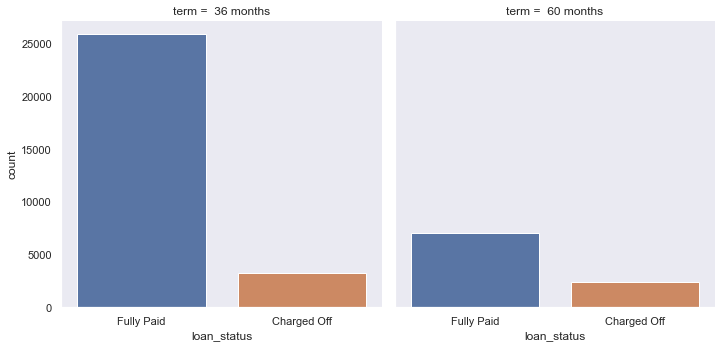

In [44]:
catplot = sns.catplot(x='loan_status',col='term',data=loan,kind='count')
plt.show()

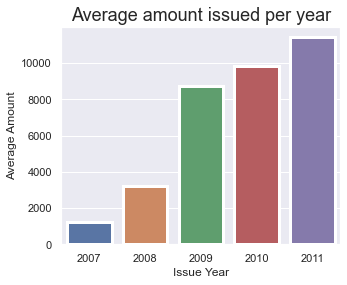

In [45]:
loan_by_avg_amt_peryear = loan.groupby('issue_year', as_index=False).agg({"funded_amnt_inv": "mean"})
sns.set(rc={'figure.figsize':(5.0,4.00)})
sns.barplot(x='issue_year', y='funded_amnt_inv', data=loan_by_avg_amt_peryear, linewidth=3)
plt.title("Average amount issued per year", fontsize=18)
plt.xlabel("Issue Year", fontsize=12)
plt.ylabel("Average Amount", fontsize=12)
plt.show()

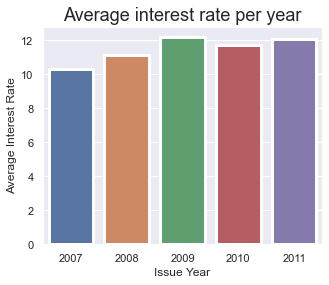

In [92]:
loan_by_avg_int_peryear = loan.groupby('issue_year', as_index=False).agg({"int_rate": "mean"})
sns.set(rc={'figure.figsize':(5.0,4.00)})
sns.barplot(x='issue_year', y='int_rate', data=loan_by_avg_int_peryear, linewidth=3)
plt.title("Average interest rate per year", fontsize=18)
plt.xlabel("Issue Year", fontsize=12)
plt.ylabel("Average Interest Rate", fontsize=12)
plt.show()

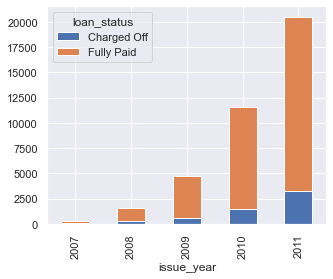

In [97]:
loans_by_year = loan.groupby(['issue_year', 'loan_status']).size()
loans_by_year.unstack().plot(kind='bar', stacked=True)

### Note: The higher the DTI is, the less likely it is that the individual to repay debt


In [46]:
b_list = [5,9,12,15,25]
labels_list = ['low','med','high','very high']
loan['intRate_cat'] = pd.cut(loan['int_rate'],bins=b_list,labels=labels_list,include_lowest=True,right=True)
print(loan.groupby('intRate_cat')['loan_status'].count())


intRate_cat
low           9808
med          10853
high          9920
very high     7996
Name: loan_status, dtype: int64


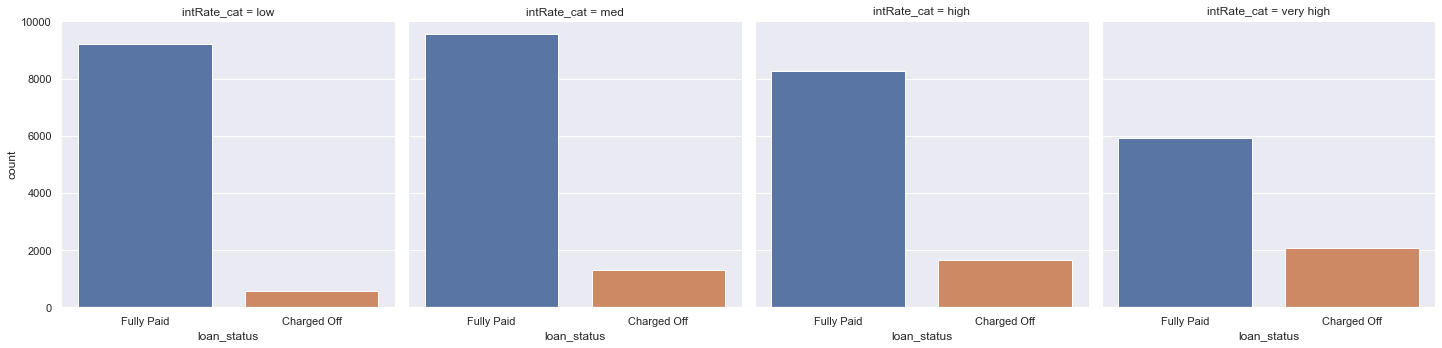

In [47]:
catplot = sns.catplot(x='loan_status',col='intRate_cat',data=loan,kind='count')
plt.show()

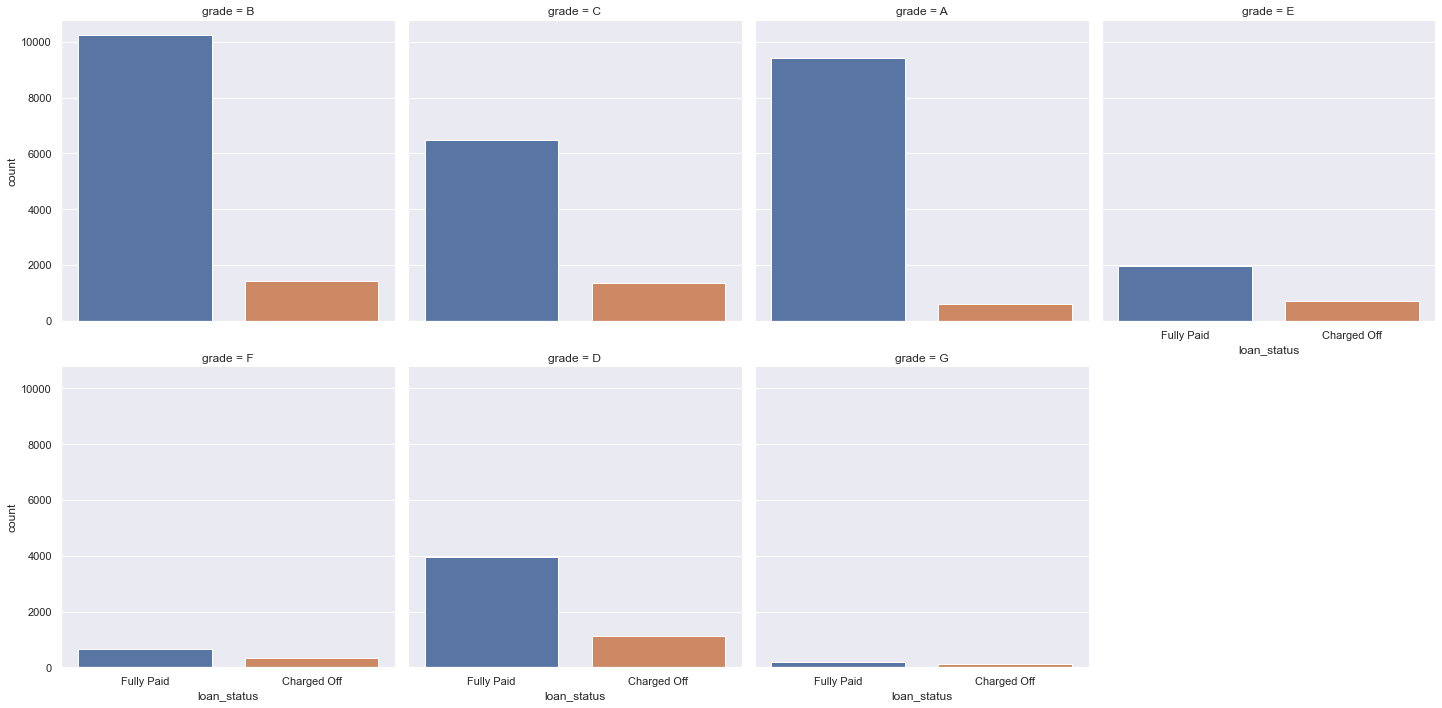

In [48]:
catplot = sns.catplot(x='loan_status',col='grade',data=loan,kind='count',col_wrap=4)
plt.show()

In [49]:
loan['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

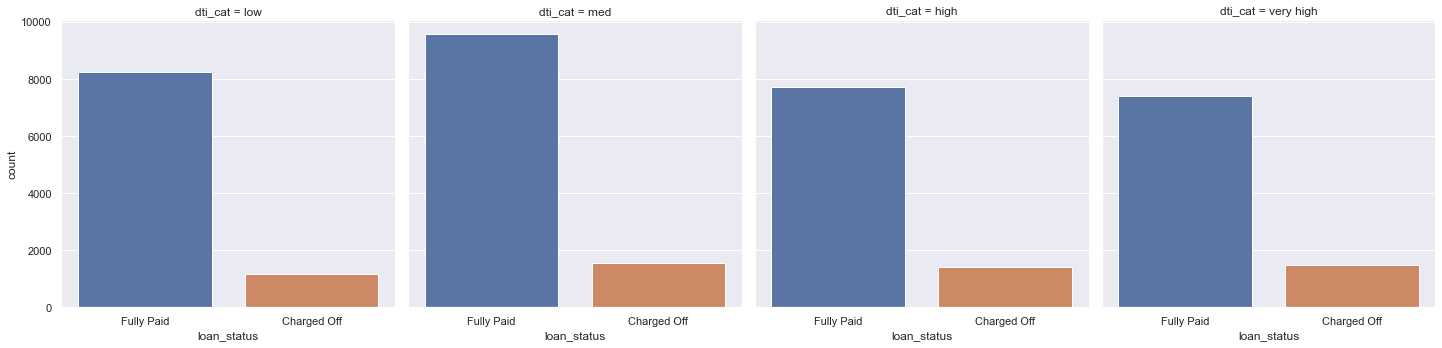

In [50]:

b_list = [0,8,14,19,30]
labels_list = ['low','med','high','very high']
loan['dti_cat'] = pd.cut(loan['dti'],bins=b_list,labels=labels_list,include_lowest=True,right=False)
catplot = sns.catplot(x='loan_status',col='dti_cat',data=loan,kind='count')
plt.show()

In [51]:
loan['total_acc'].describe()

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [52]:
loan.head()

id  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  1077501         5000           4975.0   36 months     10.65       162.87   
1  1077430         2500           2500.0   60 months     15.27        59.83   
2  1077175         2400           2400.0   36 months     15.96        84.33   
3  1076863        10000          10000.0   36 months     13.49       339.31   
5  1075269         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  ...  inq_last_6mths open_acc  \
0     B        B2        10.0           RENT  ...               1        3   
1     C        C4         0.0           RENT  ...               5        3   
2     C        C5        10.0           RENT  ...               2        2   
3     C        C1        10.0           RENT  ...               1       10   
5     A        A4         3.0           RENT  ...               3        9   

  revol_util total_acc issue_date issue_year  issue_month annualIncome_cat  \
0       83.7         9 2011-12-01       2011           12             poor   
1        9.4         4 2011-12-01       2011           12             poor   
2       98.5        10 2011-12-01       2011           12             poor   
3       21.0        37 2011-12-01       2011           12          low-mid   
5       28.3        12 2011-12-01       2011           12             poor   

   intRate_cat    dti_cat  
0          med  very high  
1    very high        low  
2    very high        med  
3         high  very high  
5          low        med  

[5 rows x 28 columns]

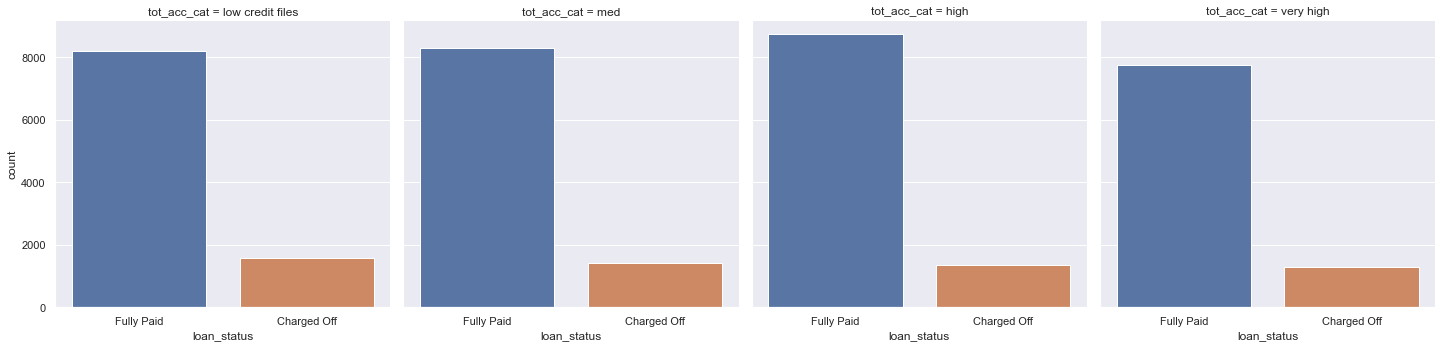

In [53]:

b_list = [0,13,20,29,90]
labels_list = ['low credit files','med','high','very high']
loan['tot_acc_cat'] = pd.cut(loan['total_acc'],bins=b_list,labels=labels_list,include_lowest=True,right=True)
catplot = sns.catplot(x='loan_status',col='tot_acc_cat',data=loan,kind='count')
plt.show()

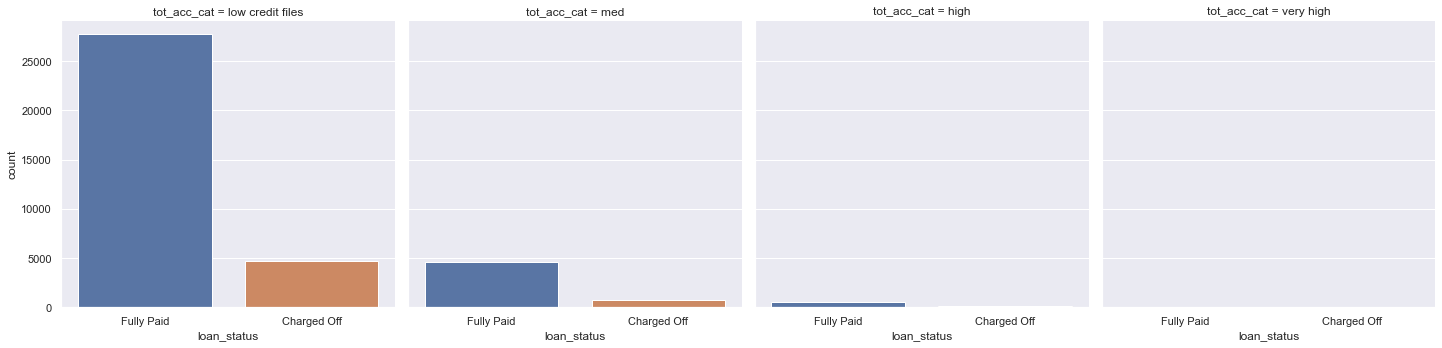

In [54]:
loan['open_acc'].describe()
b_list = [0,13,20,29,90]
labels_list = ['low credit files','med','high','very high']
loan['tot_acc_cat'] = pd.cut(loan['open_acc'],bins=b_list,labels=labels_list,include_lowest=True,right=True)
catplot = sns.catplot(x='loan_status',col='tot_acc_cat',data=loan,kind='count')
plt.show()

## BIVARIATE ANALYSIS

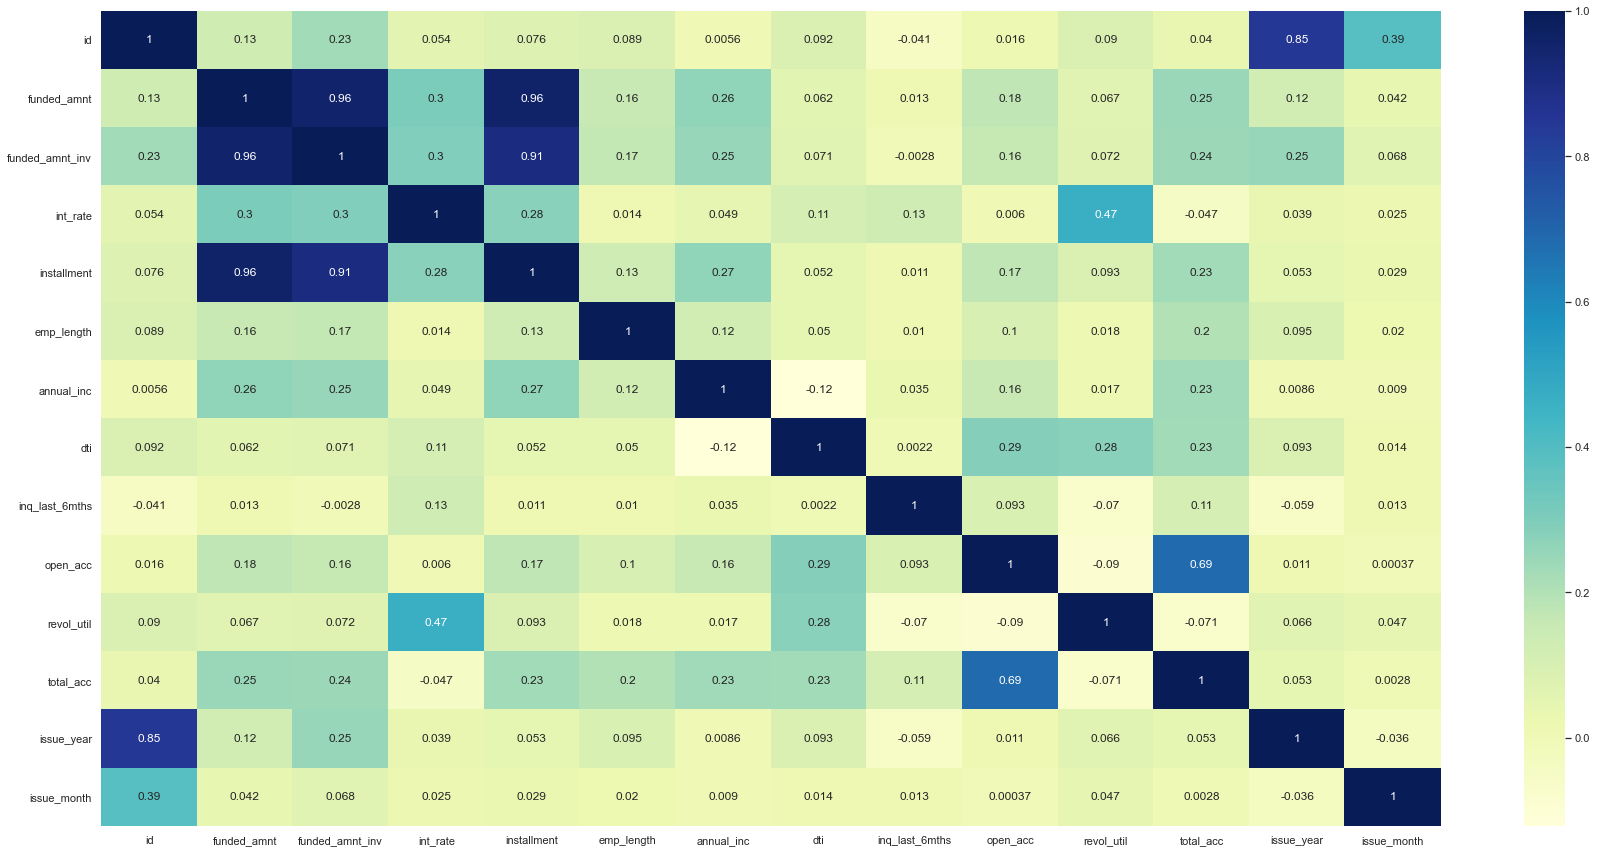

In [55]:
# Bivariate analysis for continous variables

corr = loan.corr()
plt.figure(figsize = (30,15))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="YlGnBu")
plt.show()

### Grade vs Loan Status


<Figure size 1800x2160 with 0 Axes>

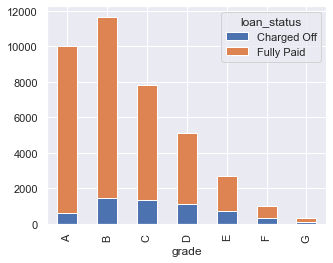

In [56]:
fig = plt.figure(figsize=(25,30))
loans_by_grade = loan.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)


### SubGrade vs Loan Status


<Figure size 3240x2160 with 0 Axes>

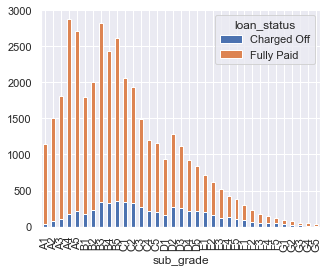

In [100]:
fig = plt.figure(figsize=(45,30))
loans_by_grade = loan.groupby(['sub_grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)

### Calculate % for funded amount and loans in each grade

In [58]:
Grade_percent = pd.pivot_table(loan, values=['funded_amnt', 'id'],columns=['loan_status'],index=['grade'],aggfunc={'id': (lambda x:x.count()),'funded_amnt': np.sum})
Grade_percent = Grade_percent.reset_index()
Grade_percent

grade funded_amnt                     id           
loan_status       Charged Off Fully Paid Charged Off Fully Paid
0               A     4590650   79740800         602       9443
1               B    15054300  109722950        1425      10250
2               C    14498050   68505200        1347       6487
3               D    13320575   47377375        1118       3967
4               E    10918125   29315750         715       1948
5               F     5908050   11129075         319        657
6               G     1846625    4089100         101        198

In [59]:
Grade_percent.head(20)

grade funded_amnt                     id           
loan_status       Charged Off Fully Paid Charged Off Fully Paid
0               A     4590650   79740800         602       9443
1               B    15054300  109722950        1425      10250
2               C    14498050   68505200        1347       6487
3               D    13320575   47377375        1118       3967
4               E    10918125   29315750         715       1948
5               F     5908050   11129075         319        657
6               G     1846625    4089100         101        198

In [60]:
Grade_percent['grd_ChargeOff%'] = round(100*(Grade_percent['id']['Charged Off']/ Grade_percent['id']['Charged Off'].sum()),2)
Grade_percent['grd_FullyPaid%'] = round(100*(Grade_percent['id']['Fully Paid']/ Grade_percent['id']['Fully Paid'].sum()),2)
Grade_percent['fundedAmntChgOff%'] = round(100*(Grade_percent['funded_amnt']['Charged Off'] /Grade_percent['funded_amnt']['Charged Off'].sum()),2)
Grade_percent['fundedAmntFullyPaid%'] = round(100*(Grade_percent['funded_amnt']['Fully Paid'] /Grade_percent['funded_amnt']['Fully Paid'].sum()),2)
Grade_Mstr = Grade_percent[['grade','grd_ChargeOff%','fundedAmntChgOff%','grd_FullyPaid%','fundedAmntFullyPaid%']]
pd.DataFrame(Grade_Mstr)

grade grd_ChargeOff% fundedAmntChgOff% grd_FullyPaid%  \
loan_status                                                         
0               A          10.70              6.94          28.66   
1               B          25.32             22.76          31.11   
2               C          23.94             21.92          19.69   
3               D          19.87             20.14          12.04   
4               E          12.71             16.51           5.91   
5               F           5.67              8.93           1.99   
6               G           1.79              2.79           0.60   

            fundedAmntFullyPaid%  
loan_status                       
0                          22.79  
1                          31.36  
2                          19.58  
3                          13.54  
4                           8.38  
5                           3.18  
6                           1.17

In [61]:
def MeltCols(df,aspect,valueVars,idVars):
    df1 = pd.melt(df, id_vars = idVars, value_vars = valueVars) 
    df1.columns = df1.columns.fillna('variable')
    g = sns.catplot(x=idVars, y="value", col='variable',kind='bar', data=df1,aspect=aspect)


### Calculate % of loans by loan purpose

In [62]:
Grade_Mstr.head()

grade grd_ChargeOff% fundedAmntChgOff% grd_FullyPaid%  \
loan_status                                                         
0               A          10.70              6.94          28.66   
1               B          25.32             22.76          31.11   
2               C          23.94             21.92          19.69   
3               D          19.87             20.14          12.04   
4               E          12.71             16.51           5.91   

            fundedAmntFullyPaid%  
loan_status                       
0                          22.79  
1                          31.36  
2                          19.58  
3                          13.54  
4                           8.38

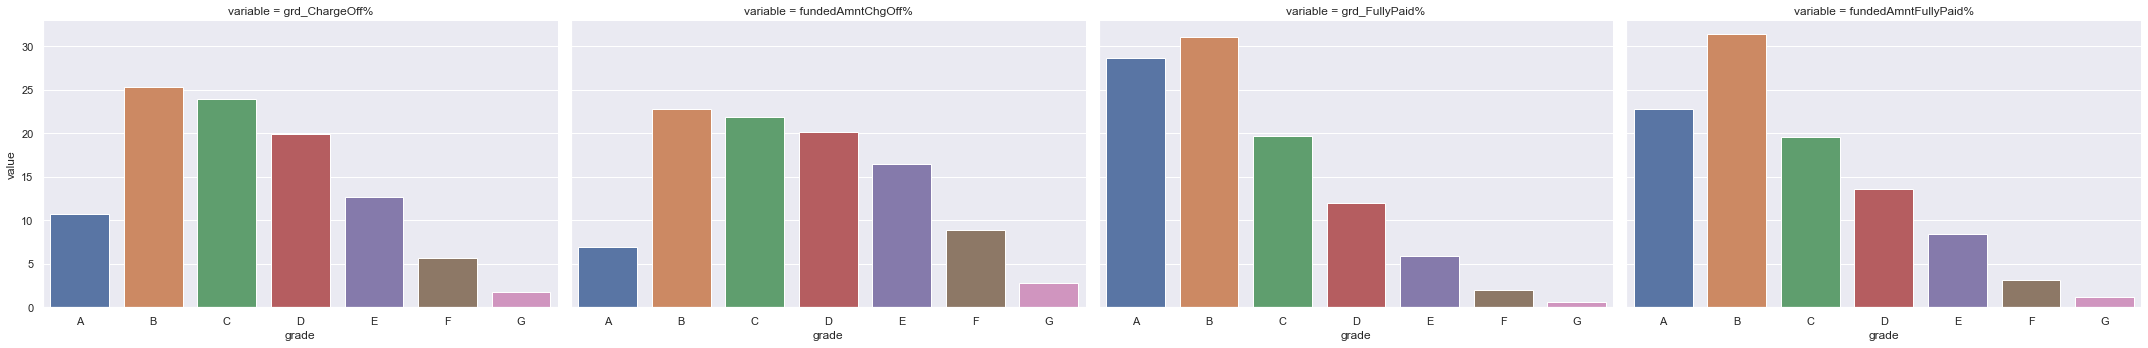

In [63]:
var_A1 = ['grd_ChargeOff%','fundedAmntChgOff%','grd_FullyPaid%','fundedAmntFullyPaid%']
MeltCols(Grade_Mstr,1.5,var_A1,'grade')
plt.show()

### Calculate % for funded amount for each state

In [64]:
purpose_pc = pd.pivot_table(loan,values=['id'],columns=['loan_status'],index=['purpose'],aggfunc={'id':(lambda x:x.count())})
purpose_pc = purpose_pc.reset_index()
purpose_pc['purposeChargeOff%'] = round(100*(purpose_pc['id']['Charged Off']/ purpose_pc['id']['Charged Off'].sum()),2)
purpose_pc['purposeFullyPaid%'] = round(100*(purpose_pc['id']['Fully Paid']/ purpose_pc['id']['Fully Paid'].sum()),2)
Purpose_mstr = purpose_pc[['purpose','purposeChargeOff%','purposeFullyPaid%']]
pd.DataFrame(Purpose_mstr).sort_values(['purposeChargeOff%'],ascending=False)

purpose purposeChargeOff% purposeFullyPaid%
loan_status                                                        
2            debt_consolidation             49.17             46.40
9                         other             11.25              9.81
1                   credit_card              9.63             13.61
11               small_business              8.44              3.88
4              home_improvement              6.17              7.67
6                major_purchase              3.95              5.85
0                           car              2.84              4.06
7                       medical              1.88              1.75
13                      wedding              1.71              2.52
8                        moving              1.63              1.47
5                         house              1.05              0.93
3                   educational              1.00              0.82
12                     vacation              0.94              0.98
10             renewable_energy              0.34              0.25

### Calculate % for funded amount for each state considering the loan statuses


In [65]:
AddressState_pc = pd.pivot_table(loan,values=['funded_amnt'],columns=['loan_status'],index=['addr_state'],aggfunc={'funded_amnt':np.sum})
AddressState_pc = AddressState_pc.reset_index()
AddressState_pc['addrStateChargeOff%'] = round(100*(AddressState_pc['funded_amnt']['Charged Off']/ AddressState_pc['funded_amnt']['Charged Off'].sum()),2)
AddressState_pc['addrStateFullyPaid%'] = round(100*(AddressState_pc['funded_amnt']['Fully Paid']/ AddressState_pc['funded_amnt']['Fully Paid'].sum()),2)
AddressState_Mstr = AddressState_pc[['addr_state','addrStateChargeOff%','addrStateFullyPaid%']]
pd.DataFrame(AddressState_Mstr).sort_values(['addrStateChargeOff%'],ascending=False).head(7)

addr_state addrStateChargeOff% addrStateFullyPaid%
loan_status                                                   
4                   CA               20.19               17.91
33                  NY                8.88                9.83
9                   FL                8.60                6.56
42                  TX                5.89                7.41
30                  NJ                5.12                4.84
10                  GA                3.60                3.50
14                  IL                3.55                4.00

### Calculating the charge off and full paid % for each purpose of loans, for top 5 states

In [66]:
top5_state = ['CA','NY','FL','TX','NJ']
loan_status5States = loan[loan['addr_state'].isin(top5_state)]
Purps = pd.pivot_table(loan_status5States,values=['id','funded_amnt'],columns=['loan_status','addr_state'],index=['purpose'],aggfunc={'id':(lambda x:x.count())})
Purps = Purps.reset_index()
Purps['purposeVsCAChargeOff%'] = round(100*(Purps['id']['Charged Off']['CA']/ Purps['id']['Charged Off']['CA'].sum()),2)
Purps['purposeVsNYChargeOff%'] = round(100*(Purps['id']['Charged Off']['NY']/ Purps['id']['Charged Off']['NY'].sum()),2)
Purps['purposeVsFLChargeOff%'] = round(100*(Purps['id']['Charged Off']['FL']/ Purps['id']['Charged Off']['FL'].sum()),2)
Purps['purposeVsTXChargeOff%'] = round(100*(Purps['id']['Charged Off']['TX']/ Purps['id']['Charged Off']['TX'].sum()),2)
Purps['purposeVsNJChargeOff%'] = round(100*(Purps['id']['Charged Off']['NJ']/ Purps['id']['Charged Off']['NJ'].sum()),2)
Purps['purposeVsCAFullyPaid%'] = round(100*(Purps['id']['Fully Paid']['CA']/ Purps['id']['Fully Paid']['CA'].sum()),2)
Purps['purposeVsNYFullyPaid%'] = round(100*(Purps['id']['Fully Paid']['NY']/ Purps['id']['Fully Paid']['NY'].sum()),2)
Purps['purposeVsFLFullyPaid%'] = round(100*(Purps['id']['Fully Paid']['FL']/ Purps['id']['Fully Paid']['FL'].sum()),2)
Purps['purposeVsTXFullyPaid%'] = round(100*(Purps['id']['Fully Paid']['TX']/ Purps['id']['Fully Paid']['TX'].sum()),2)
Purps['purposeVsNJFullyPaid%'] = round(100*(Purps['id']['Fully Paid']['NJ']/ Purps['id']['Fully Paid']['NJ'].sum()),2)
ptBVPurpose_master = Purps[['purpose','purposeVsCAChargeOff%','purposeVsNYChargeOff%','purposeVsTXChargeOff%','purposeVsFLChargeOff%','purposeVsNJChargeOff%','purposeVsCAFullyPaid%','purposeVsNYFullyPaid%','purposeVsTXFullyPaid%','purposeVsFLFullyPaid%','purposeVsNJFullyPaid%']]
pd.DataFrame(ptBVPurpose_master)

purpose purposeVsCAChargeOff% purposeVsNYChargeOff%  \
loan_status                                                                   
addr_state                                                                    
0                           car                  2.31                  2.02   
1                   credit_card                 12.80                  9.49   
2            debt_consolidation                 48.71                 53.13   
3                   educational                  0.89                  0.81   
4              home_improvement                  5.33                  3.64   
5                         house                  1.33                  0.20   
6                major_purchase                  3.11                  3.43   
7                       medical                  1.51                  2.22   
8                        moving                  2.04                  2.42   
9                         other                 10.58                 12.32   
10             renewable_energy                  0.09                  0.40   
11               small_business                  7.82                  6.67   
12                     vacation                  1.24                  1.21   
13                      wedding                  2.22                  2.02   

            purposeVsTXChargeOff% purposeVsFLChargeOff% purposeVsNJChargeOff%  \
loan_status                                                                     
addr_state                                                                      
0                            3.48                  3.17                  1.80   
1                            7.91                  9.13                  6.12   
2                           43.99                 46.03                 54.32   
3                            1.58                  1.79                  1.08   
4                            5.70                  7.94                  6.47   
5                            1.27                  1.39                  1.08   
6                            5.38                  5.95                  5.04   
7                            1.90                  1.79                  1.80   
8                            0.63                  0.99                  3.60   
9                           16.46                  9.52                  8.27   
10                           0.63                  0.40                   NaN   
11                           9.18                  9.92                  7.19   
12                           0.63                  0.20                  1.44   
13                           1.27                  1.79                  1.80   

            purposeVsCAFullyPaid% purposeVsNYFullyPaid% purposeVsTXFullyPaid%  \
loan_status                                                                     
addr_state                                                                      
0                            3.38                  3.06                  4.40   
1                           15.52                 13.05                 14.77   
2                           48.37                 47.92                 43.19   
3                            0.60                  1.00                  0.47   
4                            5.60                  5.87                  8.24   
5                            0.84                  0.56                  0.64   
6                            4.84                  5.31                  6.15   
7                            1.92                  1.37                  2.39   
8                            1.44                  2.12                  1.20   
9                            9.63                 11.52                 10.12   
10                           0.29                  0.19                  0.34   
11                           3.83                  3.53                  4.74   
12                           1.18                  1.12                  0.77   
13    

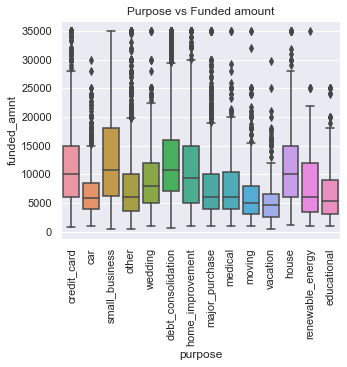

In [67]:
sns.boxplot(x='purpose', y='funded_amnt', data=loan)
plt.xticks(rotation=90)
plt.title('Purpose vs Funded amount')
plt.show()

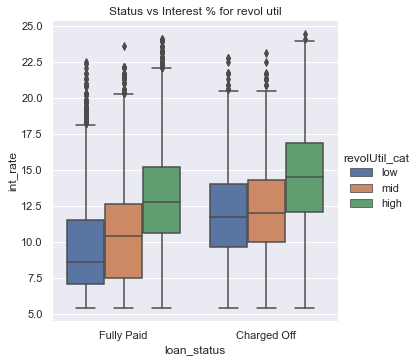

In [68]:
b_list = [0,20,40,100]
l_list = ['low','mid','high']
loan['revolUtil_cat'] = pd.cut(loan['revol_util'],bins=b_list,labels=l_list,include_lowest=True,right=True)
catplot = sns.catplot(x='loan_status',y='int_rate',hue='revolUtil_cat',data=loan,kind='box')
plt.title('Status vs Interest % for revol util')
plt.show()

In [69]:
loan.columns

Index(['id', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc', 'issue_date', 'issue_year',
       'issue_month', 'annualIncome_cat', 'intRate_cat', 'dti_cat',
       'tot_acc_cat', 'revolUtil_cat'],
      dtype='object')

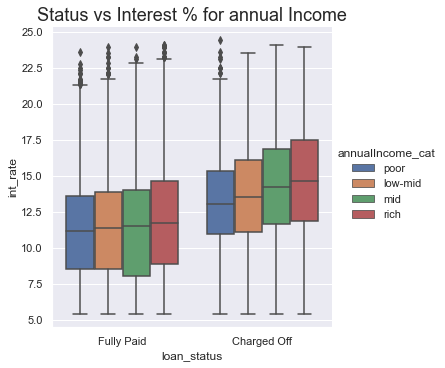

In [70]:
catplot = sns.catplot(x='loan_status',y='int_rate',hue='annualIncome_cat',data=loan,kind='box')
plt.title('Status vs Interest % for annual Income',fontsize=18)
plt.show()

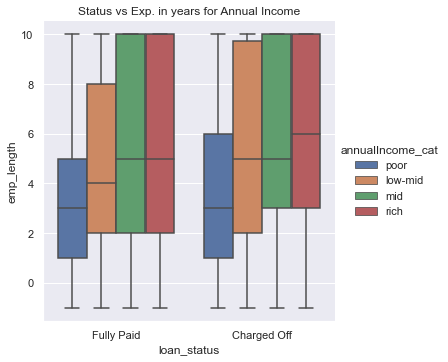

In [71]:
catplot = sns.catplot(x='loan_status',y='emp_length',hue='annualIncome_cat',data=loan,kind='box')
plt.title('Status vs Exp. in years for Annual Income')
plt.show()

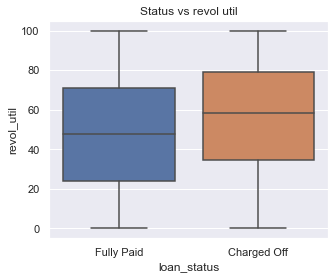

In [72]:
sns.boxplot(x='loan_status',y='revol_util',data=loan)
plt.title("Status vs revol util")
plt.show()

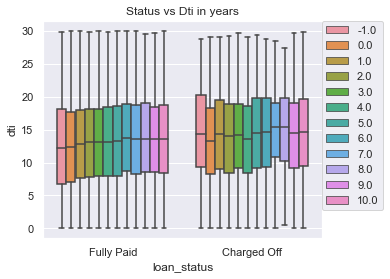

In [73]:
sns.boxplot(x='loan_status',y='dti',hue='emp_length',data=loan)
plt.title("Status vs Dti in years")
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.)
plt.show()

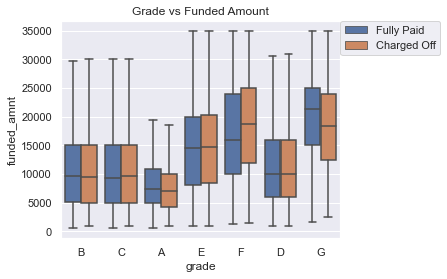

In [74]:
catplot = sns.boxplot(x='grade',y='funded_amnt',hue='loan_status',data=loan,showfliers=False)
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.)
plt.title('Grade vs Funded Amount')
plt.show()

## DERIVED METRICS

In [75]:
def Bucket_DTI (value):
    if (value <= 10):
        return '10'
    elif (value >10) and (value <=20):
        return '20'
    elif (value > 20):
        return '21'

loan['Buket_DTI'] = loan.dti.apply(Bucket_DTI).astype('int64')

In [76]:
def Bucket_interestRate (value):
    if (value <= 8):
        return '8'
    elif (value >8) and (value <=16):
        return '16'
    elif (value > 16):
        return '17'

loan['Bucket_IntRate'] = loan.int_rate.apply(Bucket_interestRate).astype('int64')

In [77]:
def Bucket_Acc (value):
    if (value <= 10):
        return '10'
    elif (value >10) and (value <=20):
        return '20'
    elif (value >20) and (value <=30):
        return '30'
    elif (value > 30):
        return '31'

loan['Bucket_openACC'] = loan.open_acc.apply(Bucket_Acc).astype('int64')

In [78]:
def Bucket_FundAMOUNT (value):
    if (value <= 10000):
        return '10000'
    elif (value >10000) and (value <=20000):
        return '20000'
    elif (value > 20000):
        return '20001'

loan['Bucket_fundedAMOUNT'] = loan.funded_amnt.apply(Bucket_FundAMOUNT).astype('int64')

In [79]:
loan[['id','dti','Buket_DTI','int_rate','Bucket_IntRate','open_acc','Bucket_openACC','funded_amnt','Bucket_fundedAMOUNT']].head(5)

id    dti  Buket_DTI  int_rate  Bucket_IntRate  open_acc  \
0  1077501  27.65         21     10.65              16         3   
1  1077430   1.00         10     15.27              16         3   
2  1077175   8.72         10     15.96              16         2   
3  1076863  20.00         20     13.49              16        10   
5  1075269  11.20         20      7.90               8         9   

   Bucket_openACC  funded_amnt  Bucket_fundedAMOUNT  
0              10         5000                10000  
1              10         2500                10000  
2              10         2400                10000  
3              10        10000                10000  
5              10         5000                10000

## Lookup correlation between the derived columns

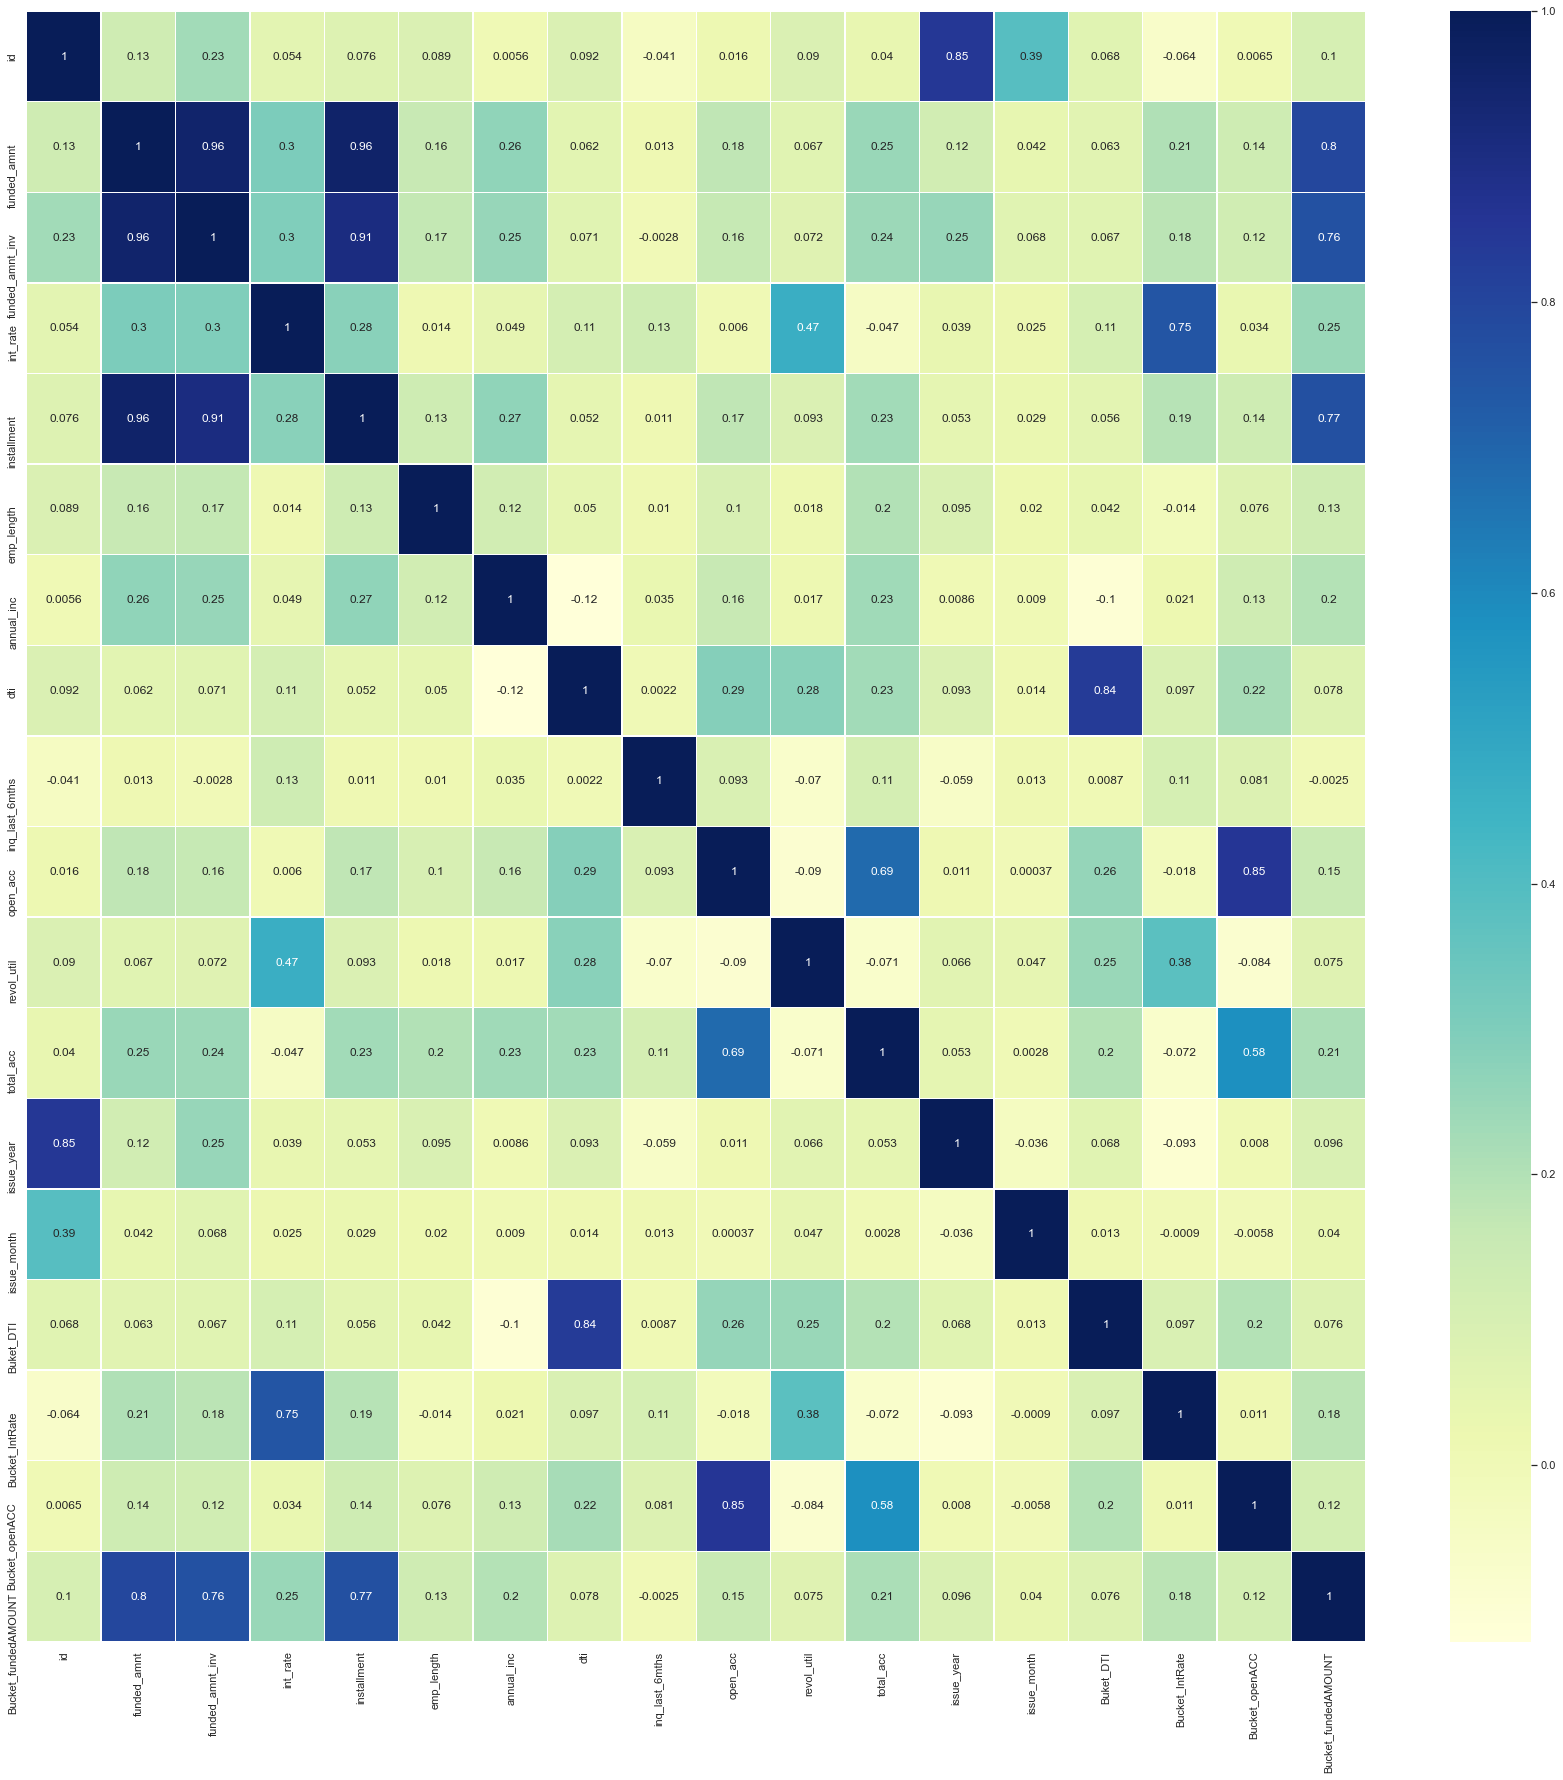

In [80]:
corr = loan.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values,linewidths=.5,cmap="YlGnBu")
plt.show()

# Finalizing driver variables for potential loan defaulters

In [81]:
loan.columns

Index(['id', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc', 'issue_date', 'issue_year',
       'issue_month', 'annualIncome_cat', 'intRate_cat', 'dti_cat',
       'tot_acc_cat', 'revolUtil_cat', 'Buket_DTI', 'Bucket_IntRate',
       'Bucket_openACC', 'Bucket_fundedAMOUNT'],
      dtype='object')

In [82]:
#FundedAmount_PC
FundedAmount_PC = pd.pivot_table(loan,values=['id'],columns=['loan_status'],index=['Bucket_fundedAMOUNT'],aggfunc={'id':len})
FundedAmount_PC = FundedAmount_PC.reset_index()
FundedAmount_PC['Total'] = FundedAmount_PC['id']['Charged Off'] + FundedAmount_PC['id']['Fully Paid']
FundedAmount_PC['%'] = (FundedAmount_PC['id']['Charged Off'] * 100) / (FundedAmount_PC['id']['Charged Off'] + FundedAmount_PC['id']['Fully Paid'])
FundedAmount_PC = FundedAmount_PC.reset_index()
FundedAmount_PC

index Bucket_fundedAMOUNT          id             Total          %
loan_status                           Charged Off Fully Paid                  
0               0               10000        2995      19557  22552  13.280419
1               1               20000        1870      10340  12210  15.315315
2               2               20001         762       3053   3815  19.973788

In [83]:
#InterestRate_PC
InterestRate_PC = pd.pivot_table(loan,values=['id'],columns=['loan_status'],index=['Bucket_IntRate'],aggfunc={'id':len})
InterestRate_PC = InterestRate_PC.reset_index()
InterestRate_PC['Total'] = InterestRate_PC['id']['Charged Off'] + InterestRate_PC['id']['Fully Paid']
InterestRate_PC['%'] = (InterestRate_PC['id']['Charged Off'] * 100) / (InterestRate_PC['id']['Charged Off'] + InterestRate_PC['id']['Fully Paid'])
InterestRate_PC = InterestRate_PC.reset_index()
InterestRate_PC

index Bucket_IntRate          id             Total          %
loan_status                      Charged Off Fully Paid                  
0               0              8         440       7778   8218   5.354101
1               1             16        3625      21326  24951  14.528476
2               2             17        1562       3846   5408  28.883136

In [84]:
#DTI_PC
DTI_PC = pd.pivot_table(loan,values=['id'],columns=['loan_status'],index=['Buket_DTI'],aggfunc={'id':len})
DTI_PC = DTI_PC.reset_index()
DTI_PC['Total'] = DTI_PC['id']['Charged Off'] + DTI_PC['id']['Fully Paid']
DTI_PC['%'] = (DTI_PC['id']['Charged Off'] * 100) / (DTI_PC['id']['Charged Off'] + DTI_PC['id']['Fully Paid'])
DTI_PC = DTI_PC.reset_index()
DTI_PC

index Buket_DTI          id             Total          %
loan_status                 Charged Off Fully Paid                  
0               0        10        1631      11304  12935  12.609200
1               1        20        2791      15650  18441  15.134754
2               2        21        1205       5996   7201  16.733787

In [85]:
#OPENACC_PC
OPENACC_PC = pd.pivot_table(loan,values=['id'],columns=['loan_status'],index=['Bucket_openACC'],aggfunc={'id':len})
OPENACC_PC['Total'] = OPENACC_PC['id']['Charged Off'] + OPENACC_PC['id']['Fully Paid']
OPENACC_PC['%'] = (OPENACC_PC['id']['Charged Off'] * 100) / (OPENACC_PC['id']['Charged Off'] + OPENACC_PC['id']['Fully Paid'])
OPENACC_PC = OPENACC_PC.reset_index()
OPENACC_PC

Bucket_openACC          id             Total          %
loan_status                Charged Off Fully Paid                  
0                       10        3803      21947  25750  14.768932
1                       20        1707      10390  12097  14.110937
2                       30         109        592    701  15.549215
3                       31           8         21     29  27.586207

In [86]:
purpose_pc = pd.pivot_table(loan,values=['id'],columns=['loan_status'],index=['purpose'],aggfunc={'id':(lambda x:x.count())})
purpose_pc = purpose_pc.reset_index()
purpose_pc['purposeChargeOff%'] = round(100*(purpose_pc['id']['Charged Off']/ purpose_pc['id']['Charged Off'].sum()),2)
purpose_pc['purposeFullyPaid%'] = round(100*(purpose_pc['id']['Fully Paid']/ purpose_pc['id']['Fully Paid'].sum()),2)
Purpose_mstr = purpose_pc[['purpose','purposeChargeOff%','purposeFullyPaid%']]
pd.DataFrame(Purpose_mstr).sort_values(['purposeChargeOff%'],ascending=False)

purpose purposeChargeOff% purposeFullyPaid%
loan_status                                                        
2            debt_consolidation             49.17             46.40
9                         other             11.25              9.81
1                   credit_card              9.63             13.61
11               small_business              8.44              3.88
4              home_improvement              6.17              7.67
6                major_purchase              3.95              5.85
0                           car              2.84              4.06
7                       medical              1.88              1.75
13                      wedding              1.71              2.52
8                        moving              1.63              1.47
5                         house              1.05              0.93
3                   educational              1.00              0.82
12                     vacation              0.94              0.98
10             renewable_energy              0.34              0.25

In [87]:
Grade_percent = pd.pivot_table(loan, values=['funded_amnt', 'id'],columns=['loan_status'],index=['grade'],aggfunc={'id': (lambda x:x.count()),'funded_amnt': np.sum})
Grade_percent = Grade_percent.reset_index()
Grade_percent

grade funded_amnt                     id           
loan_status       Charged Off Fully Paid Charged Off Fully Paid
0               A     4590650   79740800         602       9443
1               B    15054300  109722950        1425      10250
2               C    14498050   68505200        1347       6487
3               D    13320575   47377375        1118       3967
4               E    10918125   29315750         715       1948
5               F     5908050   11129075         319        657
6               G     1846625    4089100         101        198

In [88]:
#another representation
status_vs_purpose = round(pd.crosstab(loan['loan_status'], loan['purpose']).apply(lambda x: x/x.sum() * 100), 2)
status_vs_purpose.head()

purpose        car  credit_card  debt_consolidation  educational  \
loan_status                                                        
Charged Off  10.67        10.78               15.33        17.23   
Fully Paid   89.33        89.22               84.67        82.77   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status                                                                    
Charged Off             12.07  16.08           10.33    15.57   15.97  16.38   
Fully Paid              87.93  83.92           89.67    84.43   84.03  83.62   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off             18.63           27.08     14.13    10.37  
Fully Paid              81.37           72.92     85.87    89.63

In [89]:
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

status_vs_purpose = round(pd.crosstab(loan['loan_status'], loan['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_charged_off = status_vs_purpose.values[0].tolist()
purpose_fullypaid = status_vs_purpose.values[1].tolist()
purpose = status_vs_purpose.columns
chargedoff_plot = go.Bar(
    x=purpose,
    y=purpose_charged_off,
    name = 'Charged Off',
)

fullypaid_plot = go.Bar(
    x=purpose,
    y=purpose_fullypaid,
    name='Fully Paid'
)


data = [chargedoff_plot, fullypaid_plot]

layout = go.Layout(
    title='Loan Status vs Purpose',
  
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [90]:
AddressState_pc = pd.pivot_table(loan,values=['funded_amnt'],columns=['loan_status'],index=['addr_state'],aggfunc={'funded_amnt':np.sum})
AddressState_pc = AddressState_pc.reset_index()
AddressState_pc['addrStateChargeOff%'] = round(100*(AddressState_pc['funded_amnt']['Charged Off']/ AddressState_pc['funded_amnt']['Charged Off'].sum()),2)
AddressState_pc['addrStateFullyPaid%'] = round(100*(AddressState_pc['funded_amnt']['Fully Paid']/ AddressState_pc['funded_amnt']['Fully Paid'].sum()),2)
AddressState_Mstr = AddressState_pc[['addr_state','addrStateChargeOff%','addrStateFullyPaid%']]
pd.DataFrame(AddressState_Mstr).sort_values(['addrStateChargeOff%'],ascending=False).head(7)

addr_state addrStateChargeOff% addrStateFullyPaid%
loan_status                                                   
4                   CA               20.19               17.91
33                  NY                8.88                9.83
9                   FL                8.60                6.56
42                  TX                5.89                7.41
30                  NJ                5.12                4.84
10                  GA                3.60                3.50
14                  IL                3.55                4.00

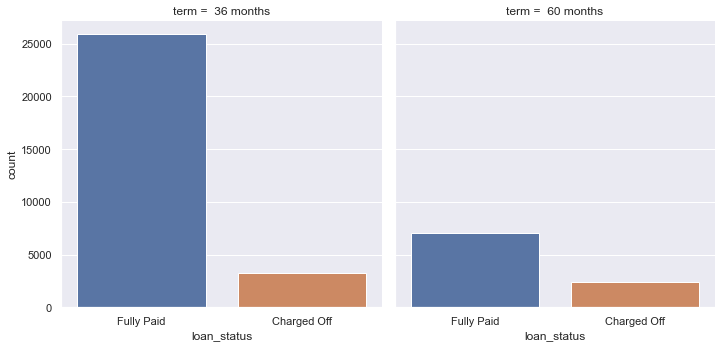

In [91]:
catplot = sns.catplot(x='loan_status',col='term',data=loan,kind='count')
plt.show()